## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('Quiz 2/LoanStatus.csv')

In [10]:
descriptive_status = df.describe()
print(descriptive_status)

blank_values = df.isnull().sum()
print(blank_values)

       ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000  592.000000         600.00000      564.000000
mean       5403.459283  146.412162         342.00000        0.842199
std        6109.041673   85.587325          65.12041        0.364878
min         150.000000    9.000000          12.00000        0.000000
25%        2877.500000  100.000000         360.00000        1.000000
50%        3812.500000  128.000000         360.00000        1.000000
75%        5795.000000  168.000000         360.00000        1.000000
max       81000.000000  700.000000         480.00000        1.000000
Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [18]:
# სესხის აღების ალბათობა Loan_Status-ის მიხედვით
total_loans = df['Loan_Status'].count()  # სესხების რაოდენობა
approved_loans = df['Loan_Status'].value_counts()['Y']  # დადასტურებული სესხების რაოდენობა
probability_loan_approval = approved_loans / total_loans
print("Probability of getting a loan:", probability_loan_approval)

Probability of getting a loan: 0.6872964169381107


In [23]:
# სესხის აღების ალბათობა როდესაც კლიენტს კარგი საკრედიტო ისტორია აქვს
good_credit_loans = df[df['Credit_History'] == 1]['Loan_Status'].value_counts()['Y'] # კარგი საკრედიტო ისტორიის მქონე ადამიანის დადასტურებული სესხების რაოდენობა
total_good_credit = df['Credit_History'].value_counts()[1] # აღებული სესხების რაოდენობა
probability_good_credit_loan = good_credit_loans / total_good_credit
print("Probability of getting a loan with good credit history:", probability_good_credit_loan)

Probability of getting a loan with good credit history: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

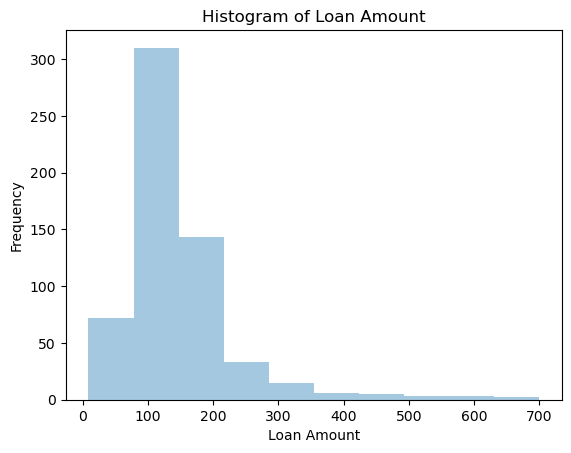

In [29]:
sns.distplot(df['LoanAmount'], kde=False, bins=10)  
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

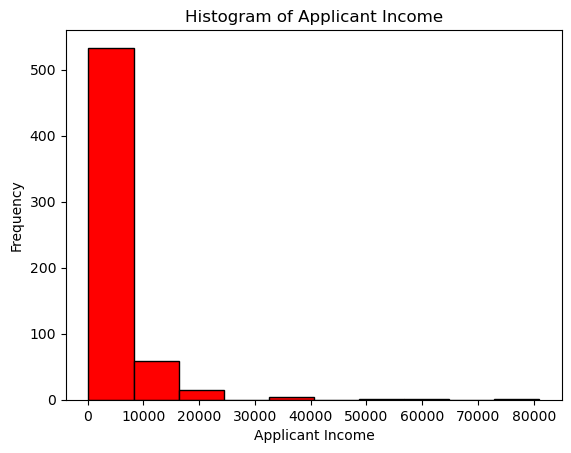

In [28]:
plt.hist(df['ApplicantIncome'], bins=10, color='red', edgecolor='black')
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [30]:
from scipy.stats import norm

In [31]:
mean_income = 2500
std_dev_income = 500
x = 2000

In [38]:
cumulative_probability = norm.cdf(x, mean_income, std_dev_income)
percentage_below_threshold = cumulative_probability * 100
print(f"Cumulative Probability of Income Below {x} euros:", cumulative_probability)
print(f"Percentage of customers with an income less than {x} euros per month:", percentage_below_threshold)

Cumulative Probability of Income Below 2000 euros: 0.15865525393145707
Percentage of customers with an income less than 2000 euros per month: 15.865525393145708


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

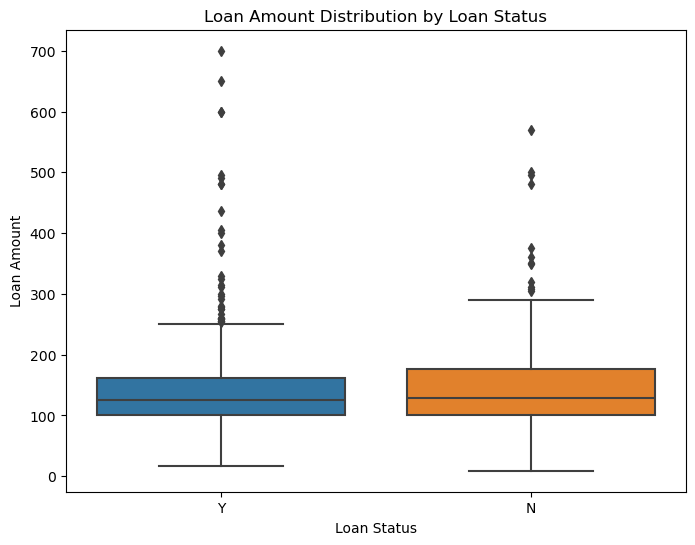

In [33]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

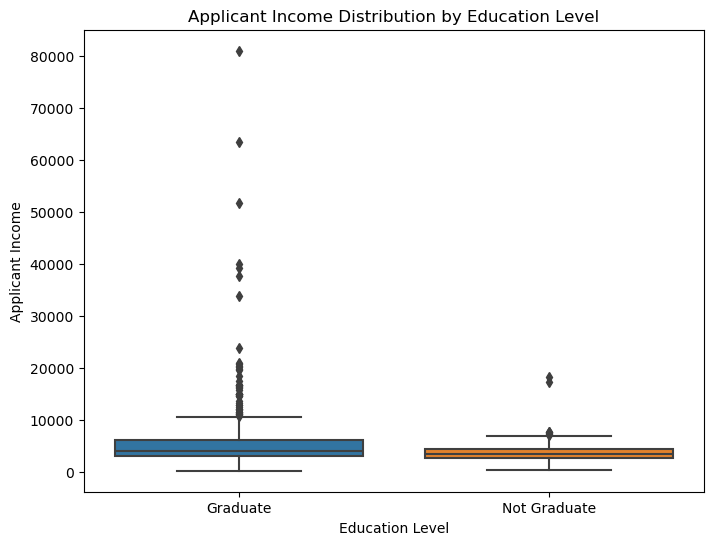

In [36]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Applicant Income')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [39]:
from scipy.stats import ttest_1samp,ttest_ind

In [44]:
sample_data = np.random.normal(loc=10, scale=2, size=100) 
sample_data_1 = np.random.normal(loc=10, scale=2, size=100)  
sample_data_2 = np.random.normal(loc=12, scale=2, size=100) 

null_hypothesis_1 = "The sample mean is equal to 10"
alternative_hypothesis_1 = "The sample mean doesn't equal to 10"
null_hypothesis_2 = "The sample mean is equal"
alternative_hypothesis_2 = "The sample mean isn't equal"

t_statistic_1, p_value_1 = ttest_1samp(sample_data, 10)


print("t-test Results:")
print("H0:", null_hypothesis_1)
print("H1:", alternative_hypothesis_1)
print("t-statistic:", t_statistic_1)
print("p-value:", p_value_1)
if p_value_1 < 0.05:
    print("Result: Reject ")
else:
    print("Result: Fail to reject ")

t-test Results:
H0: The sample mean is equal to 10
H1: The sample mean doesn't equal to 10
t-statistic: -0.4296473551699998
p-value: 0.6683858623886911
Result: Fail to reject 


In [45]:
t_statistic_2, p_value_2 = ttest_ind(sample_data_1, sample_data_2)

print("\n2 t-test Results:")
print("2 H0:", null_hypothesis_2)
print("2 H1:", alternative_hypothesis_2)
print("2 t-statistic:", t_statistic_2)
print("2 p-value:", p_value_2)
if p_value_2 < 0.05:
    print("Result: Reject ")
else:
    print("Result: Fail to reject")


2 t-test Results:
2 H0: The sample mean is equal
2 H1: The sample mean isn't equal
2 t-statistic: -7.524543541981139
2 p-value: 1.8152594527034572e-12
Result: Reject 
